# Response to the hints

1. The priors and posteriors p(theta j) will always be in beta distributions.
2. Data: Win or lose for one game follows Bernoulli distribution, while the number of wins after playing for several rounds will follow the binomial distribution. 
3. Posterior update will following alpha = x + alpha and beta = n - x + beta. 
4. Repeatedly comparing sampled values from the posterior distribution implies which game is most likely to win.
5. **Exploration versus exploitation**: It's not wise to stick to the game just because it shows advantage initially, so is to wander around different games while already knowing the best option. As the computational resource is limited, it's important to balance exploration and exploitation. In my algorithm, I will start with play each game one time, and then only play n rounds of a game every time it show an advantage in its posterior distributions. The more the game progress, the more accurate our estimation is, making it's more reasonable to exploit instead of explore. 

# Solution

## functions

In [1]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import random


def plot_posteriors(posteriors):
    #visualize posteriors
    plt.plot(parameter_domain, posteriors[0].pdf(parameter_domain), 
             label='Posterior A', color='red')  
    plt.plot(parameter_domain, posteriors[1].pdf(parameter_domain), 
             label='Posterior B', color='blue', linestyle=("-."))  
    plt.plot(parameter_domain, posteriors[2].pdf(parameter_domain), 
             label='Posterior C', color='green', linestyle='--')  
    plt.legend()
    plt.show()    
    
def update_posteriors(posteriors,game):
    posteriors[game] = stats.beta(alpha[game], beta[game])
    #output posteriors
    print(f'Posterior {game_array[game]} = beta ({alpha[game]},{beta[game]})')
    return posteriors

    
def sample_posteriors(posteriors):
    sample=[]
    for i in range(3):
        sample.append(posteriors[i].rvs())
    print("Sample from each distributions ",sample)
    max_sample = max(sample)
    game=sample.index(max_sample)
    print(f"Game {game_array[game]} is most likely to win")
    return game

def play_games(alpha, beta, game):
    # a. Simulate playing the game j for n times using binomial distribution. 
    # b. model the likelihood of winning with binomial distribution given trials n and the number of wins x.
    outcome=stats.binom(n=2,p=p[game]).rvs()
    print("I won",outcome, "out of 2 games in", game_array[game])
    # b. Update the posterior distribution for game j using the formula alpha = x + alpha and beta = n - x + beta.
    alpha[game]=outcome+alpha[game]
    beta[game]=n-outcome+beta[game]
    return alpha, beta

def if_perfect(posteriors):
    game=sample_posteriors(posteriors)
    for i in range(4):
        if sample_posteriors(posteriors)!=game: 
            print("The result is not consistent")
            return [False,game] #stop the loop while a different answer is given
    print("The result is consistent!")
    return [True, game]

## 1. Initialization

In [2]:
# a. defining the true success rate (thetas) for each games 
n=2
p=[]
parameter_domain = np.linspace(0,1,101)
game_array=["A","B","C"]

for i in range(3):
    p.append(round(np.random.random(), 1)) 

In [3]:
# b. set prior as a beta distribution with alpha=beta=1, equavalent to a uniform distribution. 

alpha = [1,1,1] # use array to represent the triplets of alpha and beta. 
beta = [1,1,1]
posteriors=[0,0,0] # The priors are named as posterior_j, as their values will be updated into posteriors 
for i in range(3):
    posteriors[i] = stats.beta(alpha[i], beta[i])

## 2. Primary Exploration

I won 0 out of 2 games in A
Posterior A = beta (1,3)
I won 0 out of 2 games in B
Posterior B = beta (1,3)
I won 1 out of 2 games in C
Posterior C = beta (2,2)


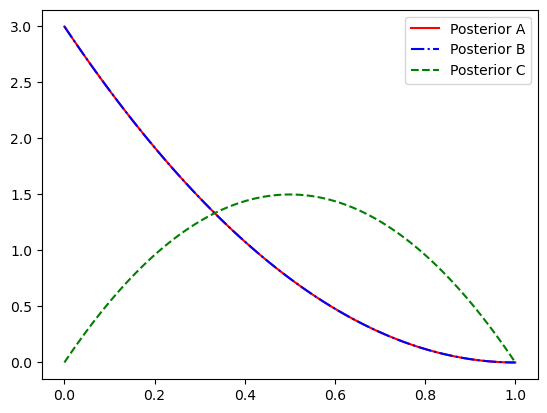

In [4]:
# play each game once and update posteriors each time

for game in range(3):
    alpha,beta=play_games(alpha, beta, game)
    posteriors=update_posteriors(posteriors,game)
plot_posteriors(posteriors)

## 3. Exploitation

In [5]:
# Sample a value from each prior distribution and play the one with the highest success rate

iterations=0
perfect=False # if one posterior distribution show salient advantage agianst other two.
while iterations<15 and perfect==False: # Repeat the process until significant differences are observed or the player decide to terminate. 
    iterations += 1
    print("")
    print("round",iterations)
    game=sample_posteriors(posteriors)     # using sampling to decide which game to play
    alpha,beta=play_games(alpha,beta,game)
    posteriors=update_posteriors(posteriors,game) 
    if iterations>5: #There will be five iterations no matter the result to ensure accuracy 
        perfect,game=if_perfect(posteriors)


round 1
Sample from each distributions  [0.07678593109713007, 0.19777010604087178, 0.1259963757544328]
Game B is most likely to win
I won 0 out of 2 games in B
Posterior B = beta (1,5)

round 2
Sample from each distributions  [0.03899451726523059, 0.16043128664038234, 0.7894465835636928]
Game C is most likely to win
I won 0 out of 2 games in C
Posterior C = beta (2,4)

round 3
Sample from each distributions  [0.13193551360875055, 0.010322173607281961, 0.15085976357889905]
Game C is most likely to win
I won 2 out of 2 games in C
Posterior C = beta (4,4)

round 4
Sample from each distributions  [0.012572811570869381, 0.1787361840049568, 0.36838980537408844]
Game C is most likely to win
I won 1 out of 2 games in C
Posterior C = beta (5,5)

round 5
Sample from each distributions  [0.2658612308534857, 0.004177895532493848, 0.6577683040415468]
Game C is most likely to win
I won 0 out of 2 games in C
Posterior C = beta (5,7)

round 6
Sample from each distributions  [0.33752849793175854, 0.04

## 4. Verification

Posterior A = beta (9,7)
Posterior B = beta (1,5)
Posterior C = beta (8,12)


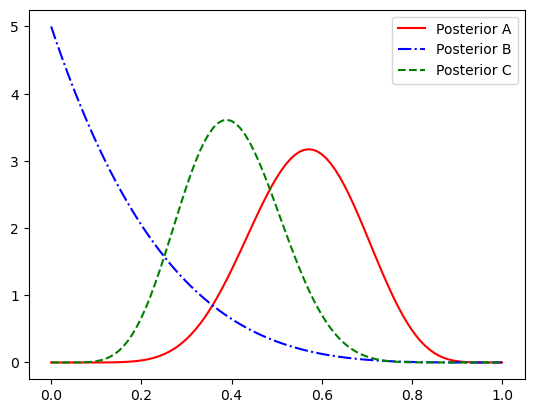


The code advise you to play game A
!!!Reveal: the true probabilities are [0.7, 0.2, 0.5] !!!
Bingo


In [9]:
for i in range(3):
    print(f'Posterior {game_array[i]} = beta ({alpha[i]},{beta[i]})')
plot_posteriors(posteriors)

print(f"\nThe code advise you to play game {game_array[game]}")
print(f"!!!Reveal: the true probabilities are {p} !!!")
if p[game]==max(p):
    success=True
    print("Bingo")
else:
    print("Sorry")